In [1]:
import argparse
import kmeans
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def make_blob(num_points):
    points = np.array([[0.5,0.5],[-0.5,-0.5]])
    noise = np.random.normal(0, 0.25, size=((int(num_points)/2, 2)))
    points = points[:, None] + noise
    return points.reshape(-1, 2)

In [67]:
points = np.array([[0.5,0.5],[-0.5,-0.5]])
noise = np.random.normal(0, 0.25, size=((int(10)/2, 2)))

In [72]:
print noise
print points[:, None]

[[ 0.12959242  0.31859478]
 [-0.15112829 -0.15799181]
 [-0.07259588  0.30615104]
 [-0.29983713  0.39695085]
 [ 0.30143354 -0.32768815]]
[[[ 0.5  0.5]]

 [[-0.5 -0.5]]]


In [69]:
print (points[:, None] + noise).shape
print (points[:, None] + noise).reshape(-1,2).shape

(2, 5, 2)
(10, 2)


In [41]:
noised_points = (points[:, None] + noise).reshape(10, 2)
noised_points[:3]

array([[ 0.94347647,  0.61268659],
       [ 0.69808908,  0.30242741],
       [ 0.25217309,  0.27982106]])

In [95]:
def plot_setup(centroids, assignments, ax, title=None, legend=False):
    colors = ('b', 'g', 'r', 'y')
    for centroid, assigns, color in zip(centroids, assignments, colors):
        size_alpha = 1 / (np.log2(len(assignments)) + 2)
        ax.scatter(*zip(*assigns), c=color, alpha=size_alpha, s=30, label='blob')
        ax.scatter(*centroid, c=color, marker='*', s=300, label='center')
    if title:
        ax.set_title(title)
    if legend:
        plt.legend(loc='best')

In [80]:
from scipy.spatial.distance import cdist
import numpy as np

array([0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
def make_centroid_assignments(X, closest_centroid_idxs):
    return [X[closest_centroid_idxs == each] for each in np.unique(closest_centroid_idxs)]


def kmeans(X, k, iterations=1000):
    centroids = X[:k]
    for _ in range(iterations):
        closest_centroid_idxs = cdist(X, centroids).argmin(axis=1)
        for index in range(k):
            centroids[index] = np.mean(X[closest_centroid_idxs == index], axis=0)
    centroid_assignments = make_centroid_assignments(X, closest_centroid_idxs)
    return centroids, centroid_assignments

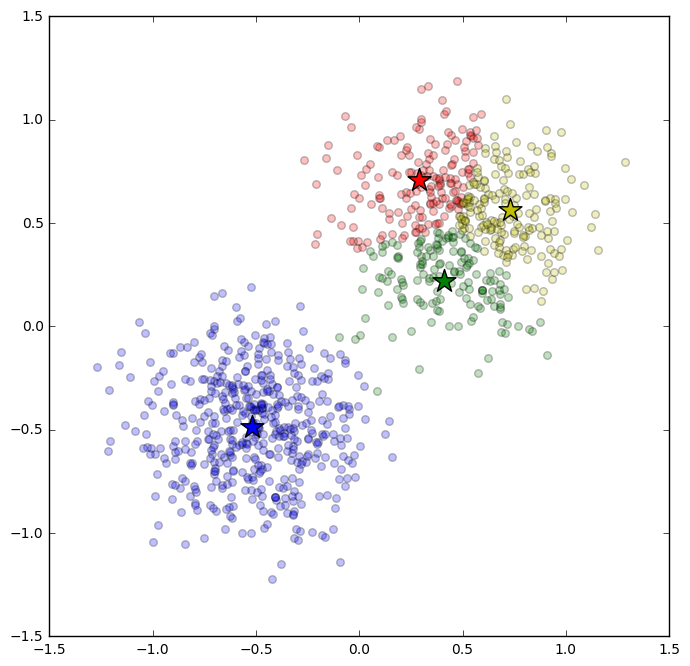

In [96]:
X = make_blob(1000)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
centroids, assignments = kmeans(X, 4)
plot_setup(centroids, assignments, ax)
plt.show()
